<a href="https://colab.research.google.com/github/th-shristi/Oasis-Infobyte/blob/main/Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name- Shristi Singh Thakur
Task-1
**Unemployment Analysis with Python**


Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Data Analysis

In [ ]:
df = pd.read_csv("/content/sample_data/Unemployment in India.csv")

In [ ]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [ ]:
rows = len(df.axes[0])
cols = len(df.axes[1])
print(rows)
print(cols)

768
7


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [ ]:
df.columns = ["Region","Date","Frequency","Estimated Unemployment Rate (%)", " Estimated Employed", "Estimated Labour Participation Rate (%)","Area"]

In [ ]:
df.isnull().sum()

Region                                     28
Date                                       28
Frequency                                  28
Estimated Unemployment Rate (%)            28
 Estimated Employed                        28
Estimated Labour Participation Rate (%)    28
Area                                       28
dtype: int64

In [ ]:
df = df.dropna(how='any',axis=0)
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [ ]:
df = df.rename(columns= {df.columns[3]: "EUR", df.columns[4]: "EE", df.columns[5]: "ELPR" })

In [ ]:
rows = len(df.axes[0])
cols = len(df.axes[1])
print(rows)
print(cols)

740
7


In [ ]:
df.describe()

,EUR,EE,ELPR
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [ ]:
df['Region'].unique()

array(['Andhra Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Delhi', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh',
       'Maharashtra', 'Meghalaya', 'Odisha', 'Puducherry', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal', 'Chandigarh'],
      dtype=object)

In [ ]:
df['Area'].unique()

array(['Rural', 'Urban'], dtype=object)

In [ ]:
df.groupby("Area").size()

Area
Rural    359
Urban    381
dtype: int64

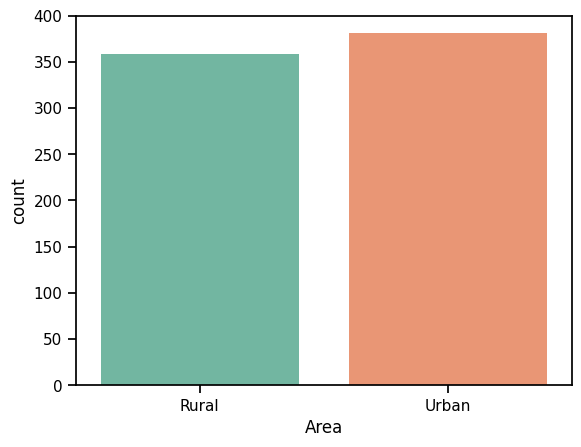

In [ ]:
sns.countplot(x=df['Area'],palette = "Set2")
plt.show()

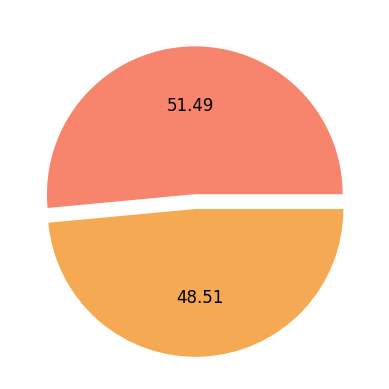

In [ ]:
plt.pie(x=df['Area'].value_counts(),autopct='%0.2f',explode = [0,0.1], colors=[ '#f7856d','#f5a952'])
plt.show()

In [ ]:
area_stats = df.groupby(['Area'])[['EUR','EE','ELPR']].mean().reset_index()
area_stats = round(area_stats,2)
area_stats

,Area,EUR,EE,ELPR
0,Rural,10.32,10192852.57,44.46
1,Urban,13.17,4388625.58,40.90


Heap Maps

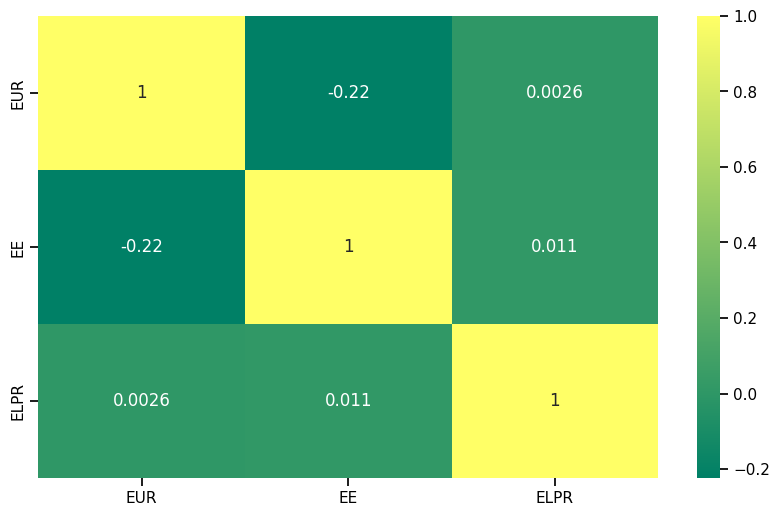

In [ ]:
heat_maps = df[['EUR','EE', 'ELPR']]

heat_maps = heat_maps.corr()

plt.figure(figsize=(10,6))
sns.set_context('notebook',font_scale=1)
sns.heatmap(heat_maps, annot=True,cmap='summer');

Unemployment rate according to different regions

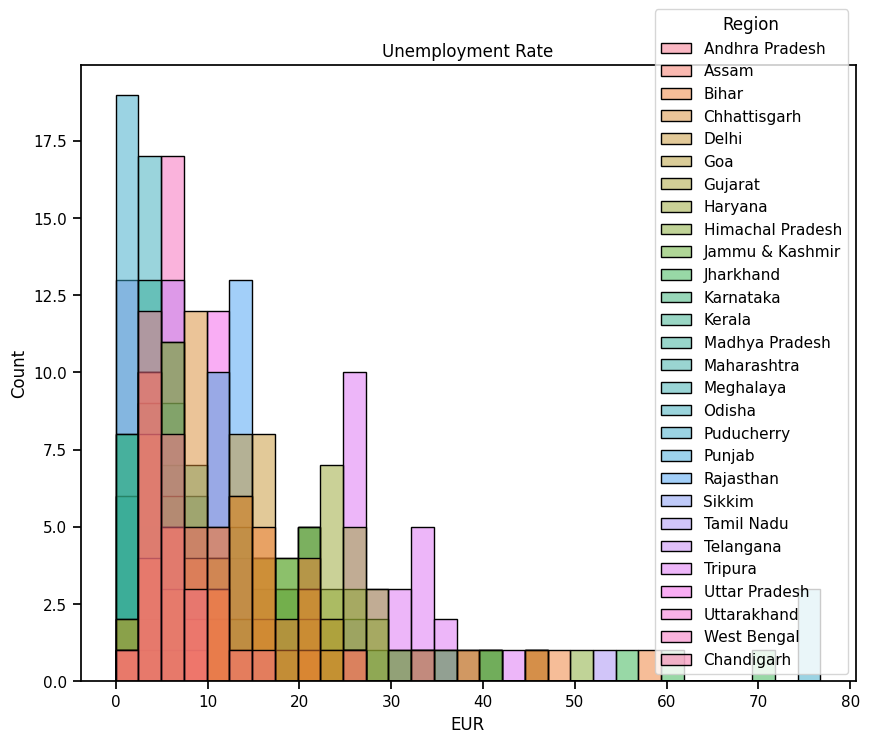

In [ ]:
df.columns= ["Region", "Date","Frequency","EUR","EE","ELPR", "Area"]

plt.figure(figsize=(10, 8))
plt.title("Unemployment Rate")
sns.histplot(x="EUR", hue="Region", data=df)
plt.show()

In [ ]:
import plotly.express as px

In [ ]:
region = df.groupby(["Region"])[['EUR', "EE", "ELPR"]].mean()
region = pd.DataFrame(region).reset_index()

fig = px.bar(region, x="Region", y="EUR", color="Region", title="Average Unemployment Rate by Region")
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

In [ ]:
unemployment = df[["Area", "Region", "EUR"]]

fig = px.sunburst(unemployment, path=['Region'], values='EUR',
                  title= 'Unemployment rate in every Region', height=550)
fig.show()

<Axes: xlabel='EUR', ylabel='Region'>

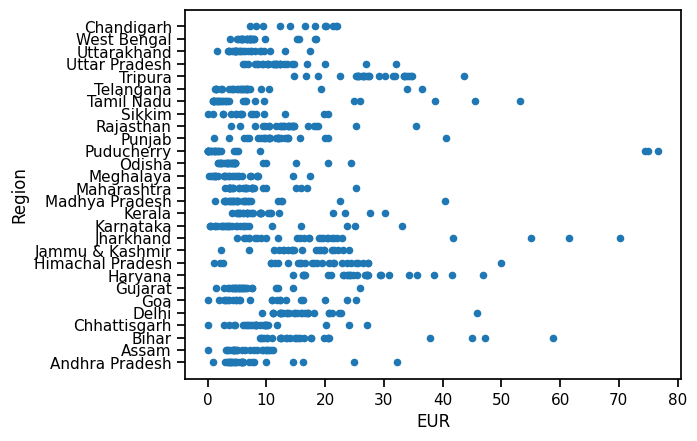

In [ ]:
df.plot(kind="scatter", x='EUR', y='Region')

<Axes: >

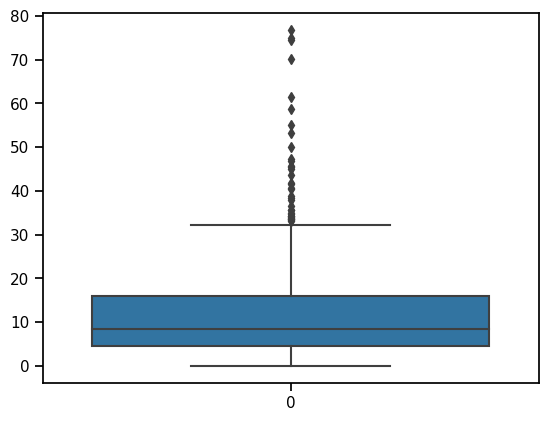

In [ ]:
sns.boxplot(df['EUR'])

Task Completed